# Lab 3 
## Color Models

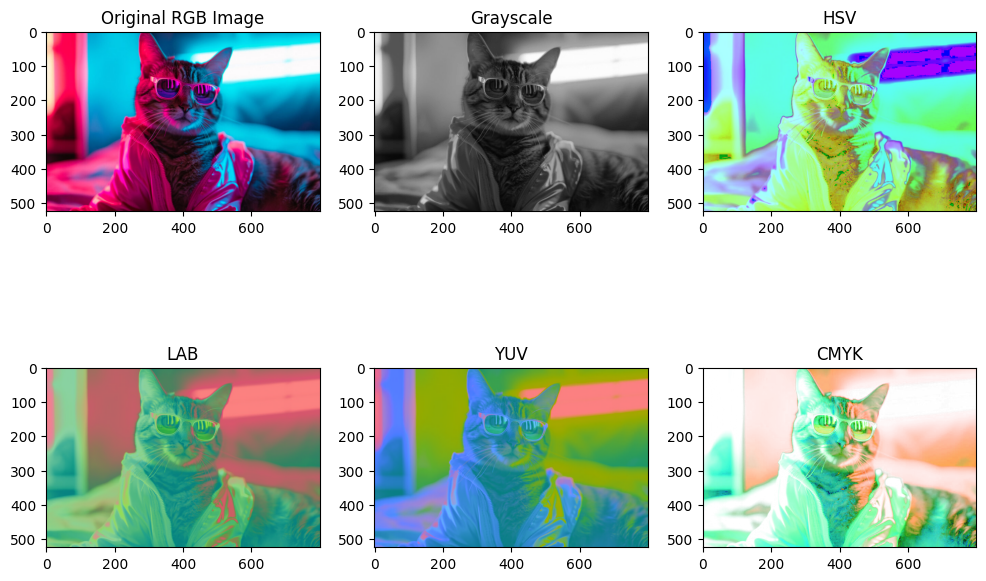

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an RGB image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/lab-3-image.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Convert to LAB
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Convert to YUV
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Convert to CMYK (OpenCV doesn't directly support CMYK, but we can simulate it)
def rgb_to_cmyk(image):
    c = 1 - (image[..., 0] / 255.0)
    m = 1 - (image[..., 1] / 255.0)
    y = 1 - (image[..., 2] / 255.0)
    k = np.minimum(c, np.minimum(m, y))
    c = (c - k) / (1 - k + 1e-10)
    m = (m - k) / (1 - k + 1e-10)
    y = (y - k) / (1 - k + 1e-10)
    cmyk_image = (np.dstack((c, m, y, k)) * 255).astype(np.uint8)
    return cmyk_image

cmyk_image = rgb_to_cmyk(image_rgb)

# Plot the images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original RGB Image')

plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')

plt.subplot(2, 3, 3)
plt.imshow(hsv_image)
plt.title('HSV')

plt.subplot(2, 3, 4)
plt.imshow(lab_image)
plt.title('LAB')

plt.subplot(2, 3, 5)
plt.imshow(yuv_image)
plt.title('YUV')

plt.subplot(2, 3, 6)
plt.imshow(cmyk_image)
plt.title('CMYK')

plt.show()


## Noise Addition 

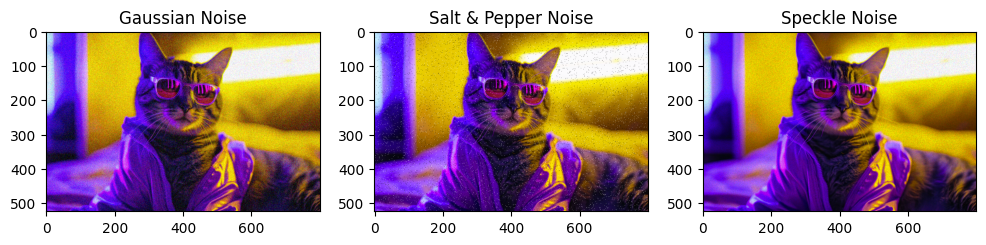

In [3]:
import random

# Add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=25):
    noisy_image = image + np.random.normal(mean, sigma, image.shape)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Add Salt & Pepper noise
def add_salt_and_pepper(image, salt_pepper_ratio=0.01):
    noisy_image = np.copy(image)
    num_salt = np.ceil(salt_pepper_ratio * image.size * 0.5)
    num_pepper = np.ceil(salt_pepper_ratio * image.size * 0.5)

    # Add salt
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 255

    # Add pepper
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 0

    return noisy_image

# Add Speckle noise
def add_speckle_noise(image):
    noise = np.random.randn(*image.shape) * 0.1
    noisy_image = image + image * noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Add noise
gaussian_noise_image = add_gaussian_noise(image)
salt_pepper_noise_image = add_salt_and_pepper(image)
speckle_noise_image = add_speckle_noise(image)

# Plot the noisy images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gaussian_noise_image)
plt.title('Gaussian Noise')

plt.subplot(1, 3, 2)
plt.imshow(salt_pepper_noise_image)
plt.title('Salt & Pepper Noise')

plt.subplot(1, 3, 3)
plt.imshow(speckle_noise_image)
plt.title('Speckle Noise')

plt.show()


## Noise Removal

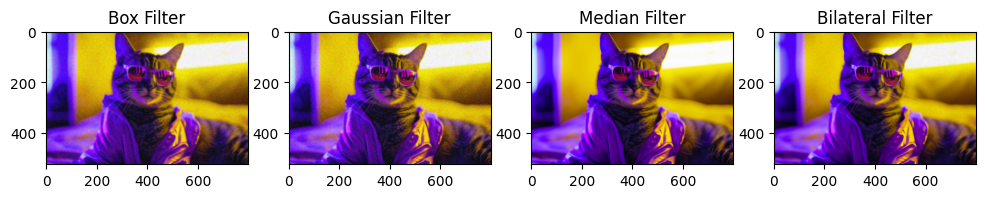

In [4]:
# Apply linear filters (Box and Gaussian)
box_filtered = cv2.boxFilter(gaussian_noise_image, -1, (5, 5))
gaussian_filtered = cv2.GaussianBlur(gaussian_noise_image, (5, 5), 0)

# Apply non-linear filters (Median, Bilateral)
median_filtered = cv2.medianBlur(salt_pepper_noise_image, 5)
bilateral_filtered = cv2.bilateralFilter(speckle_noise_image, 9, 75, 75)

# Plot the filtered images
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(box_filtered)
plt.title('Box Filter')

plt.subplot(1, 4, 2)
plt.imshow(gaussian_filtered)
plt.title('Gaussian Filter')

plt.subplot(1, 4, 3)
plt.imshow(median_filtered)
plt.title('Median Filter')

plt.subplot(1, 4, 4)
plt.imshow(bilateral_filtered)
plt.title('Bilateral Filter')

plt.show()


# Analysis

We can analyze the performance of the filters in terms of noise reduction and image quality by visually inspecting the images. The effectiveness of each filter can vary depending on the type of noise and filter size.

# Report

Color Models: Different color models like RGB, HSV, LAB, YUV, and CMYK serve different purposes in image processing. CMYK is primarily used in printing, while HSV and LAB are more suited for color manipulation in digital displays.

Noise Impact: Adding noise like Gaussian, Salt & Pepper, Poisson, and Speckle distorts the image quality by introducing random variations in pixel values, which can severely affect image details.

Effectiveness of Filters:

Linear Filters: Box and Gaussian filters are good at reducing Gaussian noise but tend to blur the image, reducing sharpness.
Non-Linear Filters: Median filters are excellent for removing Salt & Pepper noise, while Bilateral filters can preserve edges while smoothing other types of noise, like Speckle noise.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
